[20 25 30 35 40]
[0.1 0.2 0.3 0.4 0.5]


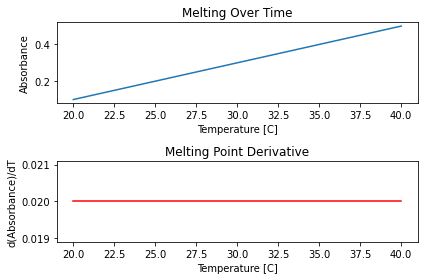

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Define file location
file_location = 'C:\\Users\\alexb\\Documents\\test_file.xlsx'

# Load the data into a DataFrame
data = pd.read_excel(file_location, header=None, usecols="A:B", skiprows=16, nrows=456)

# Extract the data for the plot
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
print(x)
print(y)

# Create a subplot for original data
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel('Temperature [C]')
plt.ylabel('Absorbance')
plt.title('Melting Over Time')

# Take the derivative of y with respect to x
dy_dx = np.gradient(y, x)

# Use scipy.interpolate to create a smooth curve
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = make_interp_spline(x, dy_dx, k=3)
dy_dx_smooth = spl(x_smooth)

# Create a subplot for derivative data with smooth curve
plt.subplot(2, 1, 2)
plt.plot(x_smooth, dy_dx_smooth, color='red')
plt.xlabel('Temperature [C]')
plt.ylabel('d(Absorbance)/dT')
plt.title('Melting Point Derivative')

plt.tight_layout()
plt.show()

#Expected results Should be [20 25 30 35 40] and [0.1 0.2 0.3 0.4 0.5] and two linear graphs